In [22]:
%pip install numpy pandas matplotlib seaborn scikit-learn

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [24]:
d1= pd.read_csv('insurance.csv')

In [25]:
d1.replace({'sex':{'female':0,'male':1}}, inplace=True)
d1.replace({'smoker':{'no':0,'yes':1}}, inplace=True)
d1.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

<ipython-input-25-2fe096b8fdbe>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d1.replace({'sex':{'female':0,'male':1}}, inplace=True)
<ipython-input-25-2fe096b8fdbe>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d1.replace({'smoker':{'no':0,'yes':1}}, inplace=True)
<ipython-input-25-2fe096b8fdbe>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set

In [26]:
d1

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,2,2205.98080
1335,18,0,36.850,0,0,0,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


In [27]:
input_d1=d1.drop(columns='charges')
output_d1=d1['charges']

In [28]:
input_train_data,input_test_data,output_train_data,output_test_data=train_test_split(input_d1,output_d1,test_size=0.25)
##converting data into 2 parts
##25% is test data and 80% is training data set

In [29]:
print(input_d1.shape,input_train_data.shape,input_test_data.shape)

(1338, 6) (1003, 6) (335, 6)


In [30]:
print(output_d1.shape,output_train_data.shape,output_test_data.shape)

(1338,) (1003,) (335,)


In [31]:
##creating model using random forest regressor
##model creation
model=RandomForestRegressor(n_estimators=100,max_depth=7)

In [32]:
##training model
model.fit(input_train_data,output_train_data)

RandomForestRegressor(max_depth=7)

In [33]:
##predicting values with test dataset
test_data_predictions=model.predict(input_test_data)

In [34]:
##evaluating model
from sklearn.metrics import r2_score

In [35]:
r2=r2_score(test_data_predictions,output_test_data)#therefore it is performing well
print(r2)

0.871975464674464


In [36]:

input_d1=(64,1,35,2,0,0)
input_d1_array=np.asarray(input_d1)
input_d1_array=input_d1_array.reshape(1,-1)

In [37]:
insurance_premium=model.predict(input_d1_array)

/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [38]:
insurance_premium[0]

np.float64(19796.69259182635)

Text(0.5, 1.0, 'prediction vs actual')

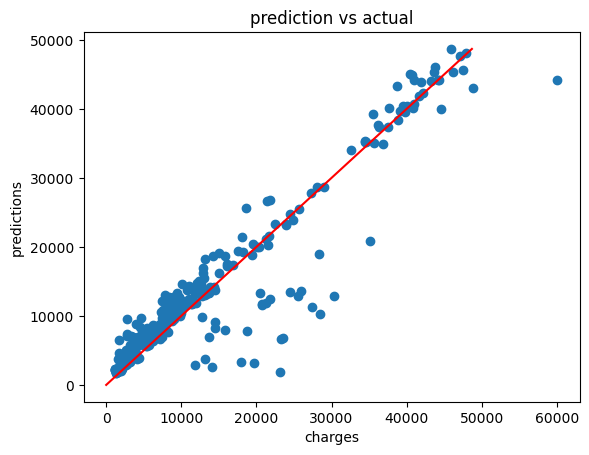

In [39]:
plt.scatter(output_test_data,test_data_predictions)
plt.plot(np.linspace(0,max(test_data_predictions)),np.linspace(0,max(test_data_predictions)),color='red')
plt.xlabel('charges')
plt.ylabel('predictions')
plt.title('prediction vs actual')

In [40]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
rmse=root_mean_squared_error(output_test_data,test_data_predictions)
print(rmse)
mae=mean_absolute_error(output_test_data,test_data_predictions)
print(mae)

4105.601712516623
2399.3907354528565


Feature: 0, Score: 0.12807
Feature: 1, Score: 0.00321
Feature: 2, Score: 0.20263
Feature: 3, Score: 0.01801
Feature: 4, Score: 0.63965
Feature: 5, Score: 0.00843


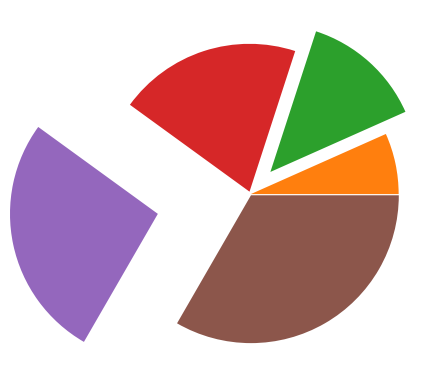

In [41]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

importance = model.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.pie([x for x in range(len(importance))], importance)
pyplot.show()

<Axes: >

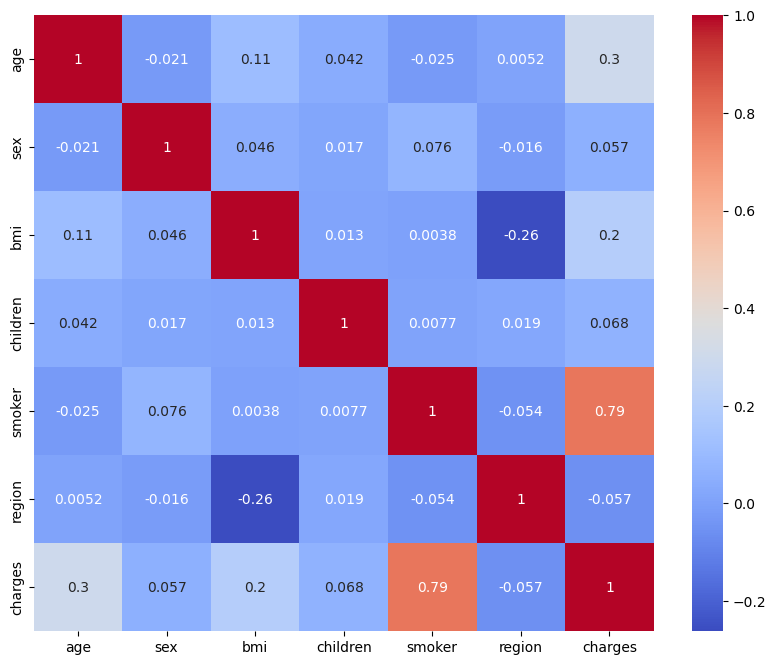

In [43]:
plt.figure(figsize=(10,8))
sns.heatmap(d1.corr(),annot=True,cmap='coolwarm')